## <div align="center"> UJIAN AKHIR SEMESTER </div>
## <div align="center"> IS388 Data Analysis</div>
#### <div align="center"> Semester Ganjil 2023/2024 </div>
---

Kelompok
1. Benedictus Arya Pradipta (00000079179)
2. Kenny Budiarso Lawson (00000081065)
3. Rafi Aldino (00000081108)
4. Muhammad Farhan Zaky (00000083525)

Class: (IS388-G) Data Analysis 

Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import pylab as pl
from sklearn import metrics
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, jaccard_score
import itertools
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier

In [3]:
dstroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
dstroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
dstroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
dstroke.shape

(5110, 12)

In [6]:
dstroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Pre Processing data

In [7]:
# Missing Value Handling
dstroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

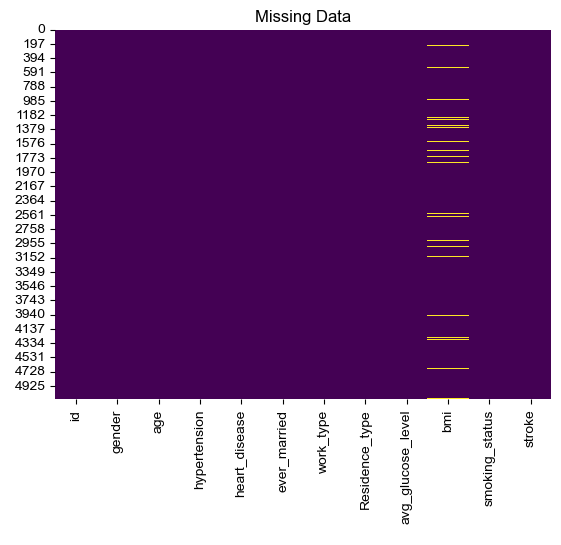

In [8]:
sns.heatmap(dstroke.isnull(), cbar=False, cmap="viridis")
sns.set(rc = {'figure.figsize':(20,8)})
plt.title('Missing Data')
plt.show()

In [9]:
# Membuat DataFrame baru untuk variable-variable yang akan digunakan
ds = dstroke[['gender', 'age', 'hypertension', 'heart_disease',
           'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                4909 non-null   float64
 6   smoking_status     5110 non-null   object 
 7   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 319.5+ KB


In [10]:
# Melihat banyaknya unique value pada tiap variable dalam dataset
ds.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

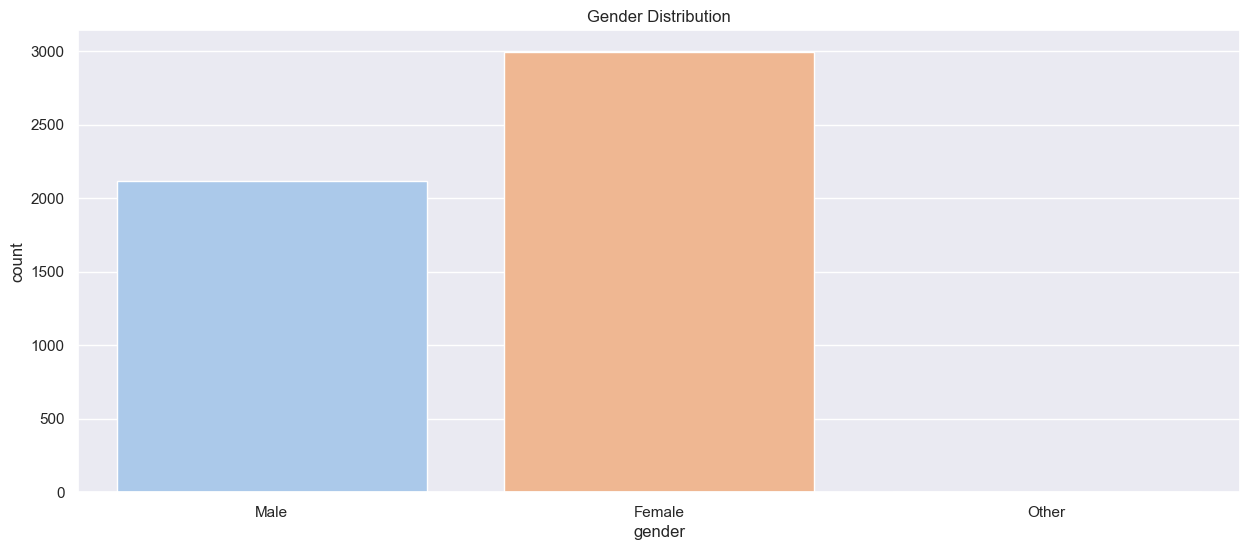

In [11]:
# Memvisualisasikan variable dengan dtype categorical dalam dataset
plt.figure(figsize=(15, 6))
colors = sns.color_palette('pastel')[0:5]
sns.countplot(x='gender', data=ds, palette=colors)
plt.title('Gender Distribution')
plt.show()

In [12]:
# Menghapus data dengan gender Other karena tidak valid
ds.drop(ds[ds['gender'] == 'Other'].index, inplace=True)

C:\Users\Raffi Aldino\AppData\Local\Temp\ipykernel_15164\2831003177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(ds[ds['gender'] == 'Other'].index, inplace=True)


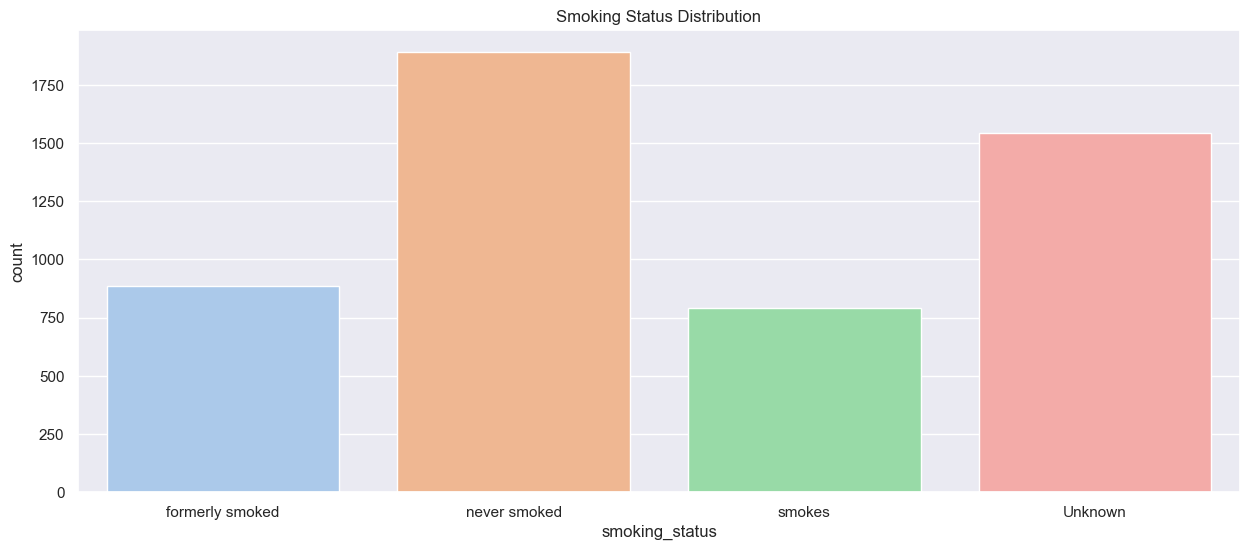

In [13]:
plt.figure(figsize=(15, 6))
colors = sns.color_palette('pastel')[0:5]
sns.countplot(x='smoking_status', data=ds, palette=colors)
plt.title('Smoking Status Distribution')
plt.show()

In [14]:
# Menghapus data dengan smoking_status Unknown karena tidak valid
ds.drop(ds[ds['smoking_status'] == 'Unknown'].index, inplace=True)

C:\Users\Raffi Aldino\AppData\Local\Temp\ipykernel_15164\1595096671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(ds[ds['smoking_status'] == 'Unknown'].index, inplace=True)


In [15]:
# Encoding beberapa variable categorical (gender & smoking_status) ke numeric
from sklearn.preprocessing import LabelEncoder

cdtype = ds[['gender', 'smoking_status']]

le = LabelEncoder()
for var in cdtype:
    ds[var] = le.fit_transform(ds[var])
    
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 5108
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3565 non-null   int32  
 1   age                3565 non-null   float64
 2   hypertension       3565 non-null   int64  
 3   heart_disease      3565 non-null   int64  
 4   avg_glucose_level  3565 non-null   float64
 5   bmi                3425 non-null   float64
 6   smoking_status     3565 non-null   int32  
 7   stroke             3565 non-null   int64  
dtypes: float64(3), int32(2), int64(3)
memory usage: 222.8 KB


C:\Users\Raffi Aldino\AppData\Local\Temp\ipykernel_15164\3517292979.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[var] = le.fit_transform(ds[var])
C:\Users\Raffi Aldino\AppData\Local\Temp\ipykernel_15164\3517292979.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[var] = le.fit_transform(ds[var])


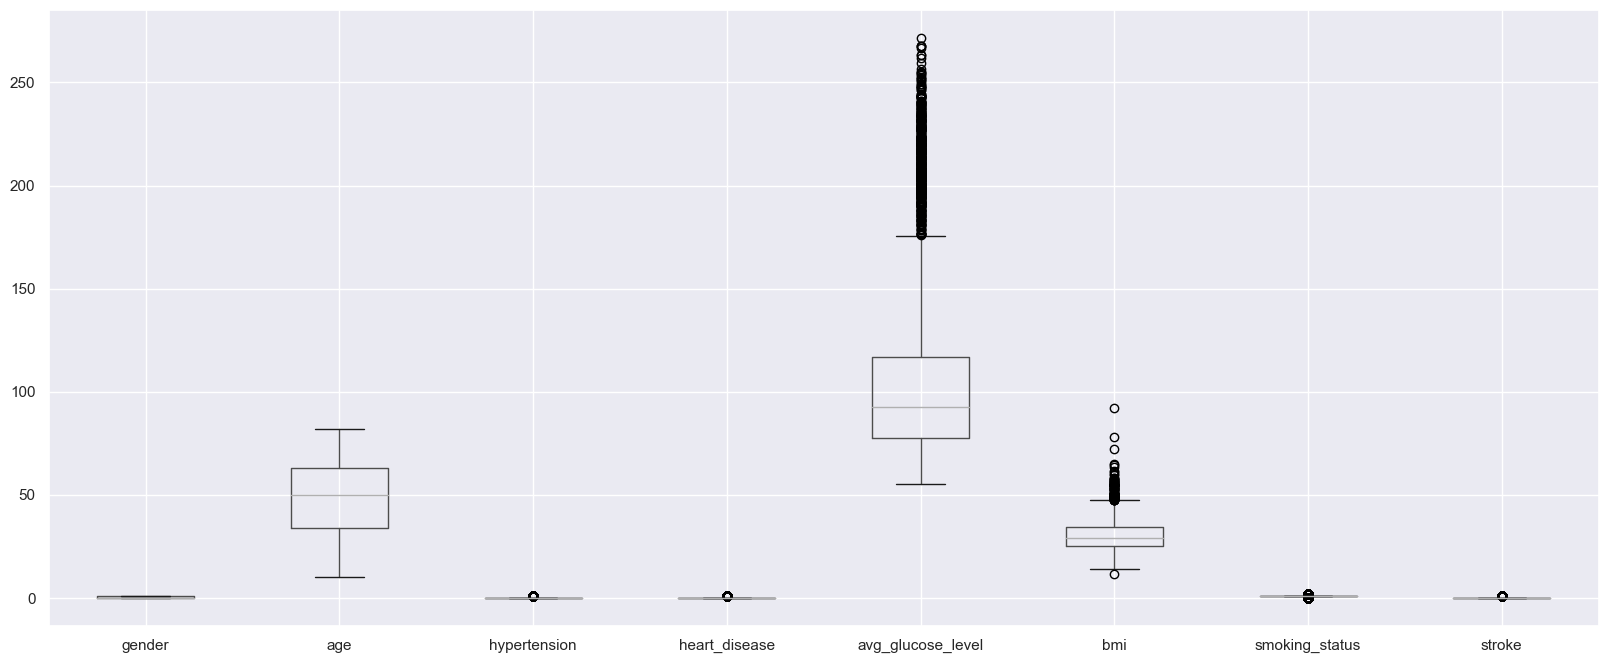

In [16]:
ds.boxplot()
plt.show()

In [17]:
# Cek NaN Values
ds.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  140
smoking_status         0
stroke                 0
dtype: int64

In [18]:
# Drop NaN Values
ds = ds.dropna()
ds

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.6,0,1
2,1,80.0,0,1,105.92,32.5,1,1
3,0,49.0,0,0,171.23,34.4,2,1
4,0,79.0,1,0,174.12,24.0,1,1
5,1,81.0,0,0,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...
5100,1,82.0,1,0,71.97,28.3,1,0
5102,0,57.0,0,0,77.93,21.7,1,0
5106,0,81.0,0,0,125.20,40.0,1,0
5107,0,35.0,0,0,82.99,30.6,1,0


* Sebelum dilakukannya drop NaN data : 5110 rows × 8 columns
* Sesudah dilakukannya drop NaN Data : 3425 rows × 8 columns

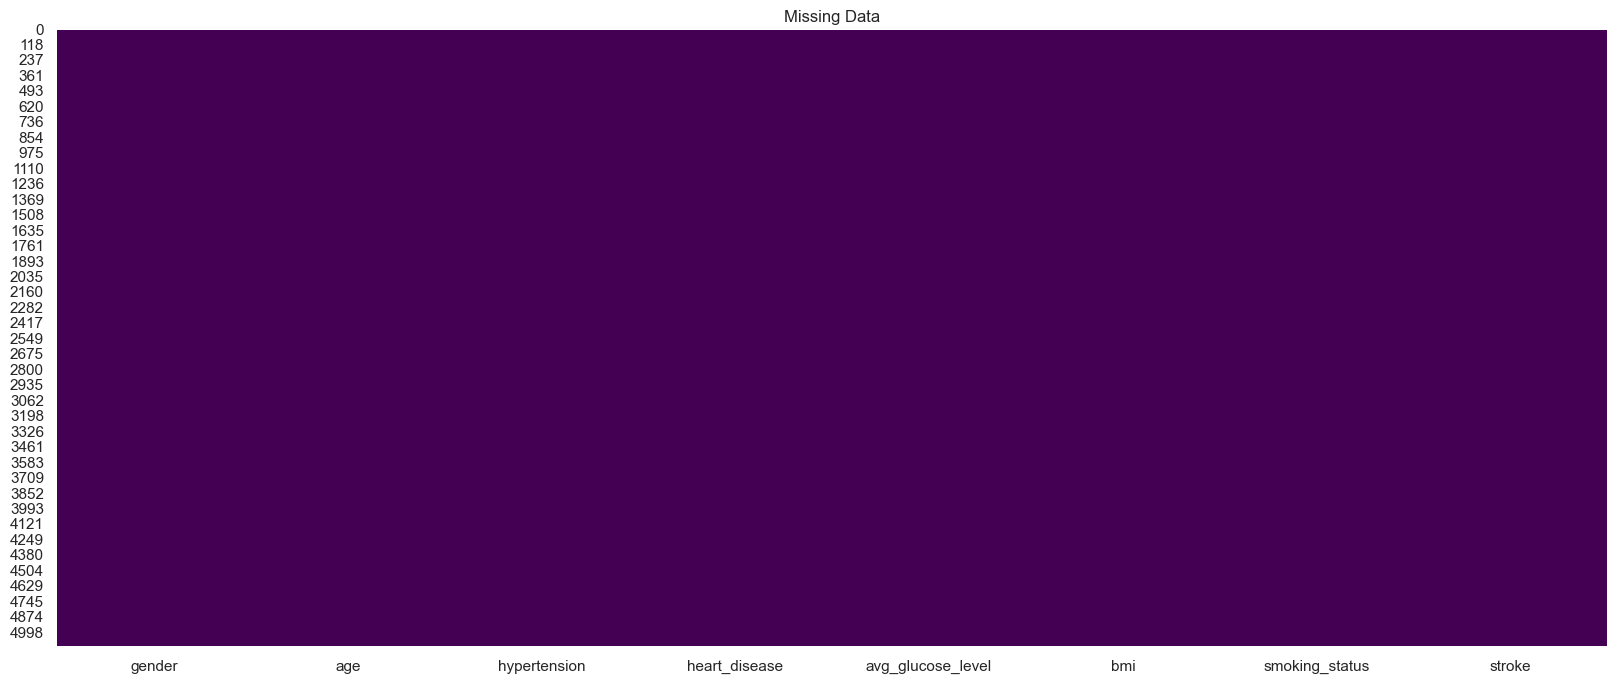

In [19]:
sns.heatmap(ds.isnull(), cbar=False, cmap="viridis")
sns.set(rc = {'figure.figsize':(20,8)})
plt.title('Missing Data')
plt.show()

Korelasi anter veriable menggunakan headmap

Text(0.5, 1.0, 'Data Correlation')

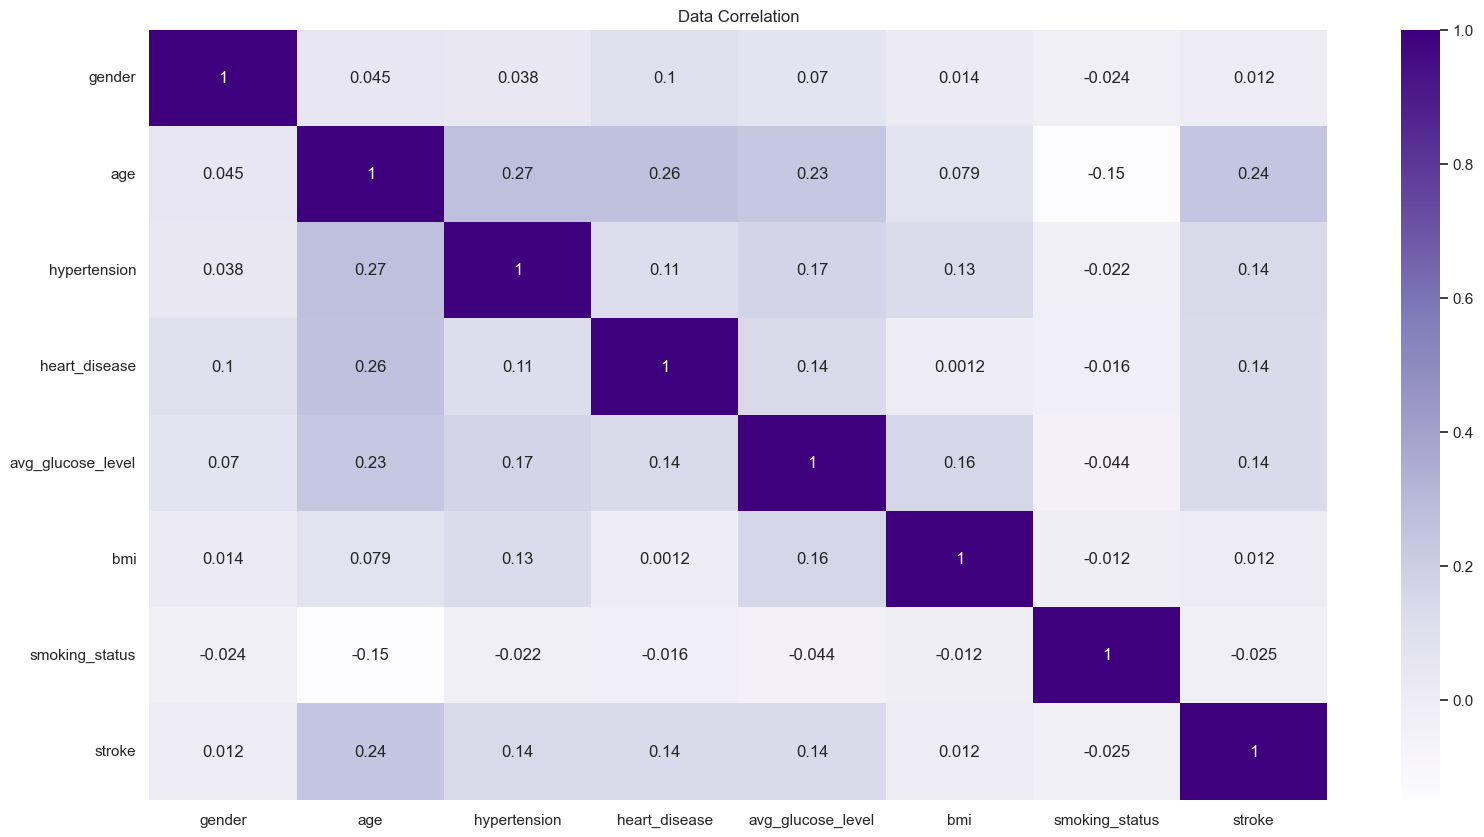

In [20]:
plt.figure(figsize = (19,10))
sns.heatmap(ds.corr(), cmap="Purples", annot=True)
plt.title('Data Correlation')

### Melakukan Pre-Processing data

Menentukan feature & target variable / class

In [21]:
# Menentukan feature & target variable / class
X = ds[['gender', 'age', 'hypertension', 'heart_disease', 
        'avg_glucose_level', 'bmi', 'smoking_status']].values
X[0:5]

array([[  1.  ,  67.  ,   0.  ,   1.  , 228.69,  36.6 ,   0.  ],
       [  1.  ,  80.  ,   0.  ,   1.  , 105.92,  32.5 ,   1.  ],
       [  0.  ,  49.  ,   0.  ,   0.  , 171.23,  34.4 ,   2.  ],
       [  0.  ,  79.  ,   1.  ,   0.  , 174.12,  24.  ,   1.  ],
       [  1.  ,  81.  ,   0.  ,   0.  , 186.21,  29.  ,   0.  ]])

In [22]:
y = ds["stroke"]
y[0:5]

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [23]:
# Melihat banyaknya orang yang terkena (1) dan tidak terkena Stroke (0)
unique_vstroke = ds["stroke"].value_counts()
unique_vstroke

0    3245
1     180
Name: stroke, dtype: int64

In [24]:
# membagi data menjadi train dan test
X_train, X_test,  y_train, y_test = train_test_split(X ,y , test_size = 0.2, random_state = 5)
print ('Train set:',X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (2740, 7) (2740,)
Test set: (685, 7) (685,)


### Modeling Algorithm Decision Tree

In [25]:
strokeTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
strokeTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [26]:
predTree = strokeTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 0 0]
1419    0
2341    0
4096    0
510     0
4315    0
Name: stroke, dtype: int64


In [27]:
#Visualization    
print('\nClassification Report for Decision Tree Algorithm:')
print('\n', classification_report(y_test, predTree))


Classification Report for Decision Tree Algorithm:

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       649
           1       0.00      0.00      0.00        36

    accuracy                           0.95       685
   macro avg       0.47      0.50      0.49       685
weighted avg       0.90      0.95      0.92       685



C:\Users\Raffi Aldino\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raffi Aldino\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raffi Aldino\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


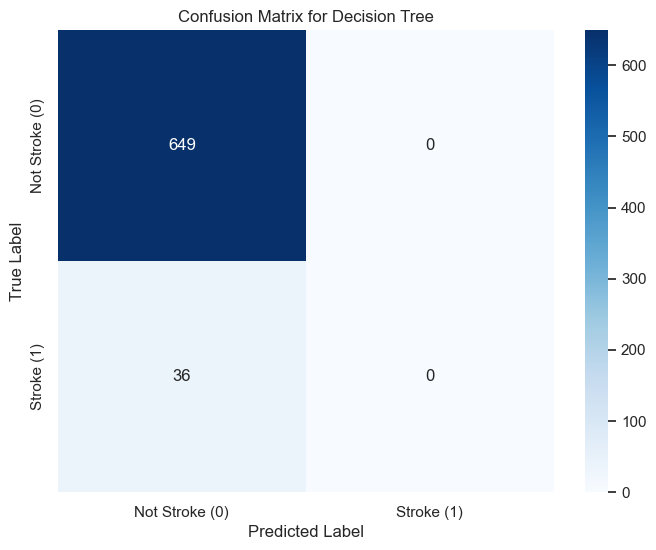

In [28]:
viz_cm = confusion_matrix(y_test, predTree)
labels = ['Not Stroke (0)', 'Stroke (1)']
          
plt.figure(figsize=(8, 6))
sns.heatmap(viz_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

DecisionTrees's Accuracy:  0.9474452554744526


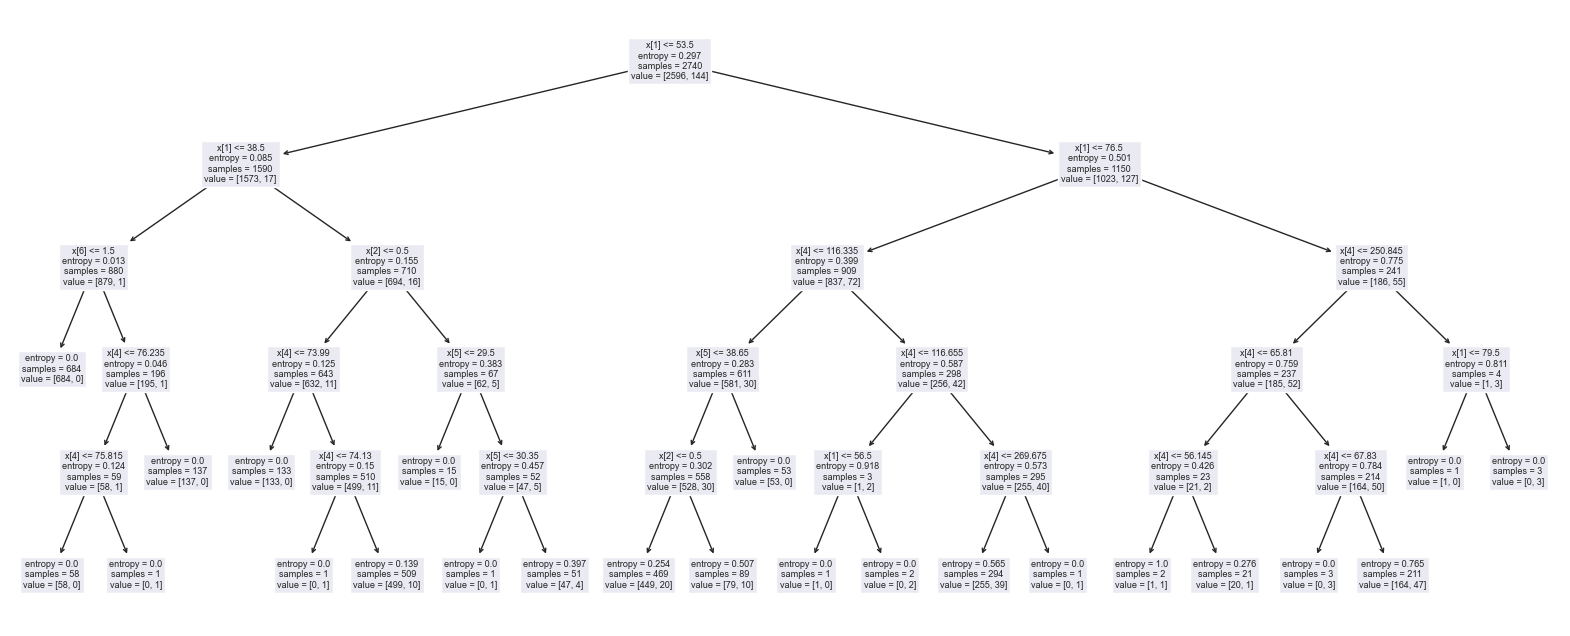

In [29]:
print ("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
tree.plot_tree(strokeTree)
plt.show()

In [30]:
#Informasi tiap node dalam bentuk teks

tree_rules = export_text(strokeTree, feature_names=['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status'])
print(tree_rules)

|--- age <= 53.50
|   |--- age <= 38.50
|   |   |--- smoking_status <= 1.50
|   |   |   |--- class: 0
|   |   |--- smoking_status >  1.50
|   |   |   |--- avg_glucose_level <= 76.23
|   |   |   |   |--- avg_glucose_level <= 75.81
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- avg_glucose_level >  75.81
|   |   |   |   |   |--- class: 1
|   |   |   |--- avg_glucose_level >  76.23
|   |   |   |   |--- class: 0
|   |--- age >  38.50
|   |   |--- hypertension <= 0.50
|   |   |   |--- avg_glucose_level <= 73.99
|   |   |   |   |--- class: 0
|   |   |   |--- avg_glucose_level >  73.99
|   |   |   |   |--- avg_glucose_level <= 74.13
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- avg_glucose_level >  74.13
|   |   |   |   |   |--- class: 0
|   |   |--- hypertension >  0.50
|   |   |   |--- bmi <= 29.50
|   |   |   |   |--- class: 0
|   |   |   |--- bmi >  29.50
|   |   |   |   |--- bmi <= 30.35
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- bmi >  30.35
|   |   |   |   

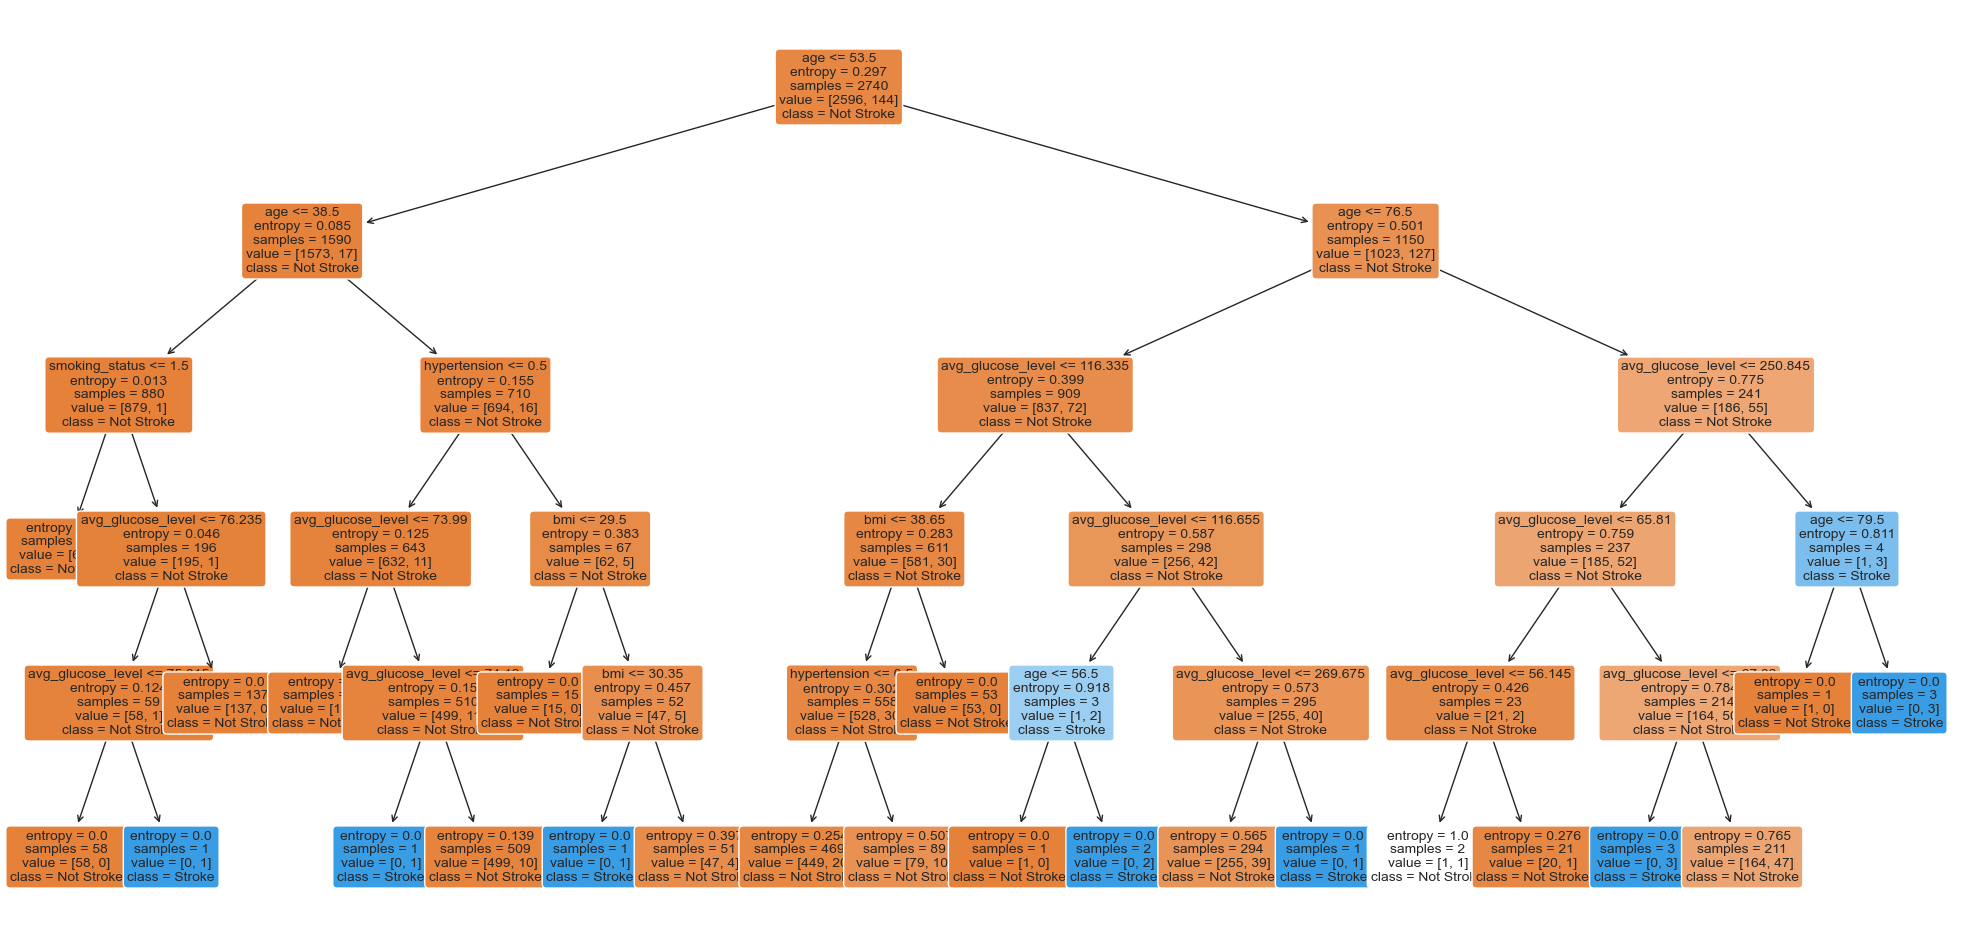

In [31]:
plt.figure(figsize=(25, 12))
plot_tree(strokeTree, filled=True, feature_names=['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status'], 
          class_names=['Not Stroke', 'Stroke'], rounded=True, fontsize=10)
plt.show()

### Algorithm K-Nearest Neighbors Classification¶

In [32]:
knn_model = KNeighborsClassifier(n_neighbors = 5) 

In [33]:
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [34]:
print('\nClassification Report for KNN:')
print('\n', classification_report(y_test, knn_pred))


Classification Report for KNN:

               precision    recall  f1-score   support

           0       0.95      0.99      0.97       649
           1       0.29      0.06      0.09        36

    accuracy                           0.94       685
   macro avg       0.62      0.52      0.53       685
weighted avg       0.91      0.94      0.92       685



In [35]:
print("KNN's Accuracy: ", metrics.accuracy_score(y_test, knn_pred))

KNN's Accuracy:  0.9430656934306569


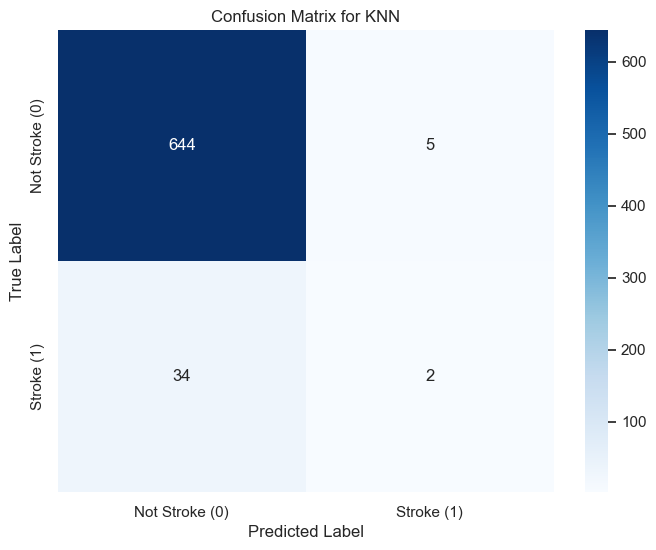

In [36]:
knn_cm = confusion_matrix(y_test, knn_pred)
labels = ['Not Stroke (0)', 'Stroke (1)']

plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Comparation algorithm yang di gunakan

In [37]:
# Classification Report Decision Tree
DT_precision = [0.95, 0.00]
DT_recall = [1.00, 0.00]
DT_f1 = [0.97, 0.00]
DT_accuracy = 0.95  

# Classification KNN
KNN_precision = [0.95, 0.29]
KNN_recall = [0.99, 0.06]
KNN_f1 = [0.97, 0.09]
KNN_accuracy =  0.94

labels = ['Not Stroke (0)', 'Stroke (1)']

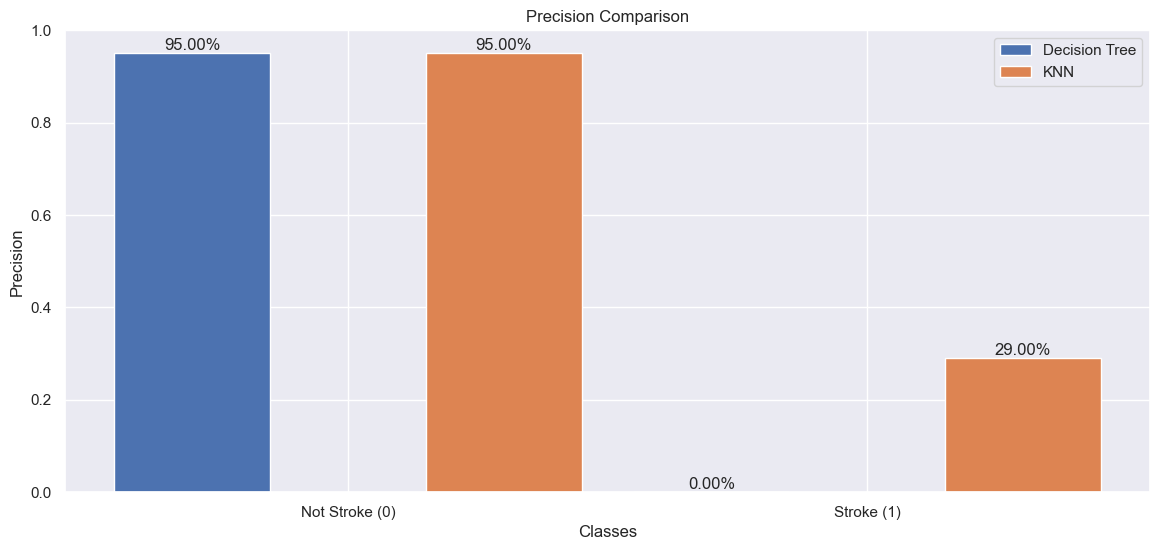

In [38]:
# Plotting precision
plt.figure(figsize=(14, 6))
bar_width = 0.3

bars_dt = plt.bar(np.arange(len(labels)), DT_precision, width=bar_width, label='Decision Tree', align='center')
bars_knn = plt.bar(np.arange(len(labels)) + 2*bar_width, KNN_precision, width=bar_width, label='KNN', align='center')

plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision Comparison')
plt.xticks(np.arange(len(labels)) + bar_width, labels)

# persentase
for bars in [bars_dt, bars_knn]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom')

plt.legend()
plt.ylim(0, 1.0)
plt.show()

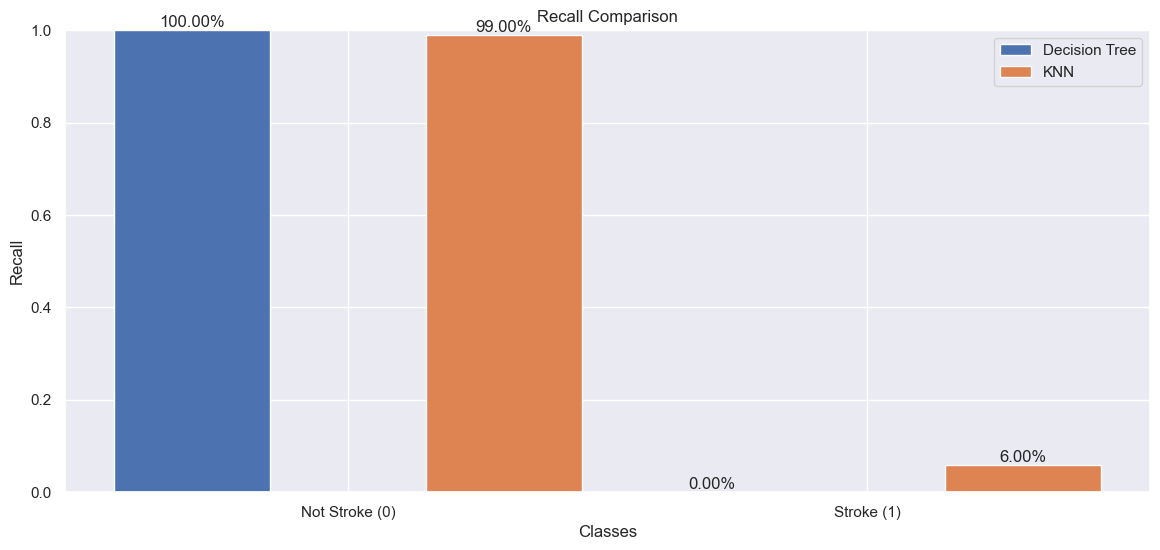

In [39]:
# Plotting recall
plt.figure(figsize=(14, 6))
bar_width = 0.3

bars_dt = plt.bar(np.arange(len(labels)), DT_recall, width=bar_width, label='Decision Tree', align='center')
bars_knn = plt.bar(np.arange(len(labels)) + 2*bar_width, KNN_recall, width=bar_width, label='KNN', align='center')

plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.xticks(np.arange(len(labels)) + bar_width, labels)

# persentase
for bars in [bars_dt, bars_knn]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom')

plt.legend()
plt.ylim(0, 1.0)
plt.show()

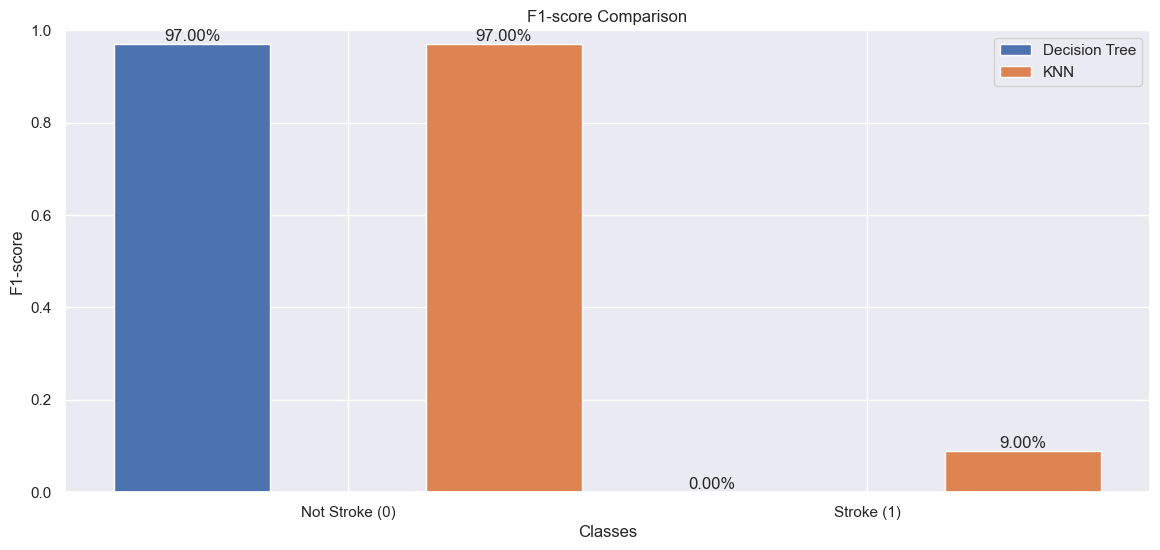

In [40]:
# Plotting F1-score
plt.figure(figsize=(14, 6))
bar_width = 0.3

bars_dt = plt.bar(np.arange(len(labels)), DT_f1, width=bar_width, label='Decision Tree', align='center')
bars_knn = plt.bar(np.arange(len(labels)) + 2*bar_width, KNN_f1, width=bar_width, label='KNN', align='center')

plt.xlabel('Classes')
plt.ylabel('F1-score')
plt.title('F1-score Comparison')
plt.xticks(np.arange(len(labels)) + bar_width, labels)

# persentase
for bars in [bars_dt, bars_knn]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom')

plt.legend()
plt.ylim(0, 1.0)
plt.show()

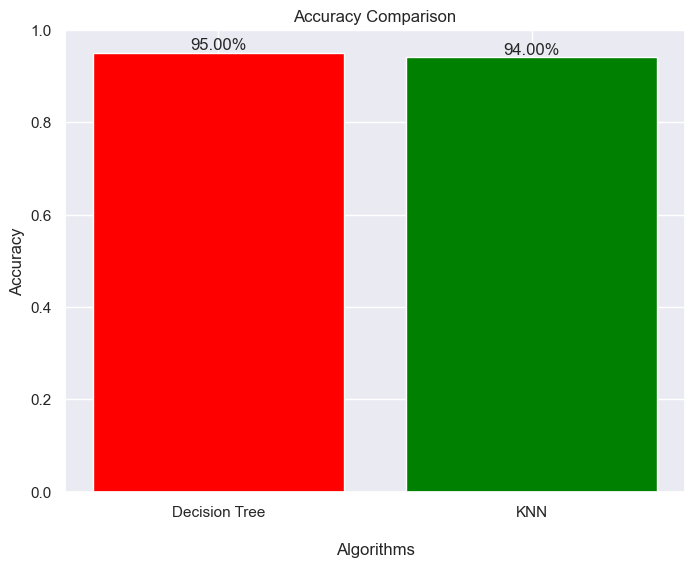

In [41]:
# Plotting Accuracy
plt.figure(figsize=(8, 6))
accuracy_values = [DT_accuracy, KNN_accuracy]
bars = plt.bar(['Decision Tree', 'KNN'], accuracy_values, color=['red', 'green'])
plt.ylim(0, 1.0)

# persentase
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom')

plt.xlabel('\nAlgorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

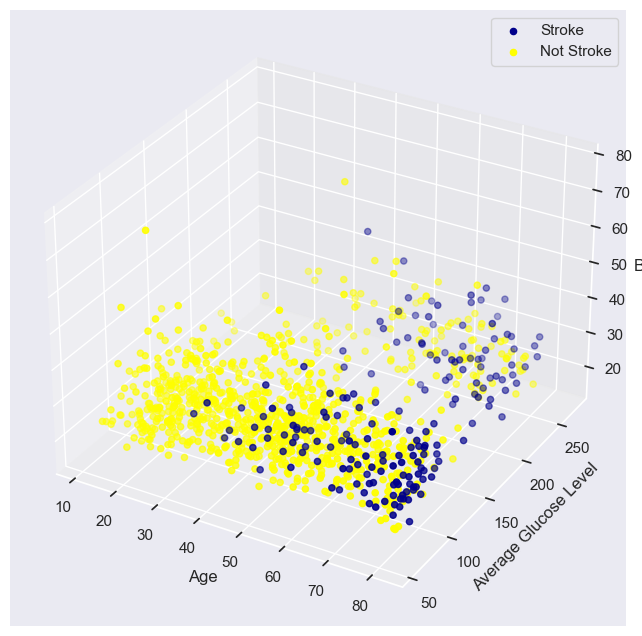

In [42]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for stroke = 1
ax.scatter(ds[ds["stroke"] == 1]['age'][:1000],
           ds[ds["stroke"] == 1]['avg_glucose_level'][:900],
           ds[ds["stroke"] == 1]['bmi'][:900],
           color='DarkBlue', label='Stroke')

# Scatter plot for stroke = 0
ax.scatter(ds[ds["stroke"] == 0]['age'][:900],
           ds[ds["stroke"] == 0]['avg_glucose_level'][:900],
           ds[ds["stroke"] == 0]['bmi'][:900],
           color='Yellow', label='Not Stroke')

# Set labels for each axis
ax.set_xlabel('Age')
ax.set_ylabel('Average Glucose Level')
ax.set_zlabel('BMI')

plt.legend()
plt.show()

In [43]:
test = [[1.  ,  67.  ,   0.  ,   1.  , 228.69,  36.6 ,   0.]]

testds = strokeTree.predict(test)
print("Menggunakan model Algorithm Decision Tree")
for prediction in testds:
    if prediction == 0:
        print("Diprediksi pasien tidak menderita Stroke")
    else:
        print("Diprediksi pasien menderita Stroke")

Menggunakan model Algorithm Decision Tree
Diprediksi pasien tidak menderita Stroke


In [44]:
test = [[1.  ,  67.  ,   0.  ,   1.  , 228.69,  36.6 ,   0.]]

testKNN = knn_model.predict(test)
print("Menggunakan model Algorithm KNN")
for prediction in testKNN:
    if prediction == 0:
        print("Diprediksi pasien tidak menderita Stroke")
    else:
        print("Diprediksi pasien menderita Stroke")

Menggunakan model Algorithm KNN
Diprediksi pasien tidak menderita Stroke


In [45]:
compare = pd.DataFrame({'Stroke Actual': y_test, 'Predicted_DT': predTree, 
                      'Predicted_KNN': knn_pred})

for column in compare:
    compare[column] = compare[column].map({0: 'Not Stroke', 1: 'Stroke'})
    
compare

,Stroke Actual,Predicted_DT,Predicted_KNN
1419,Not Stroke,Not Stroke,Not Stroke
2341,Not Stroke,Not Stroke,Not Stroke
4096,Not Stroke,Not Stroke,Not Stroke
510,Not Stroke,Not Stroke,Not Stroke
4315,Not Stroke,Not Stroke,Not Stroke
...,...,...,...
1158,Not Stroke,Not Stroke,Not Stroke
393,Not Stroke,Not Stroke,Not Stroke
4463,Not Stroke,Not Stroke,Not Stroke
2017,Not Stroke,Not Stroke,Not Stroke
